In [1]:
%reload_ext autoreload
%autoreload 2

### Get All the necessary packages

In [15]:
from collections import Counter

import joblib
import numpy as np 
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    f1_score as calculate_f1_score, accuracy_score as calculate_accuracy_score
)

### Get All the necessary utilities

In [24]:
## utilities
from utils import CleanTextTransformer, load_imdb_sentiment_analysis_dataset, DenseTransformer, CategoricalBatchNB

### Load Data

In [4]:
(X_train, y_train), (X_test, y_test) = load_imdb_sentiment_analysis_dataset(imdb_data_path='aclImdb')

loading train: pos ...



loading train: neg ...



loading test: pos ...



loading test: neg ...


### Visualize dataset size

Counter({0: 12500, 1: 12500})



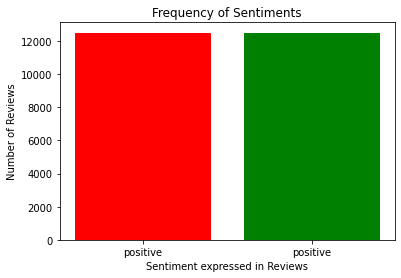

In [5]:
keys, values, labels = [], [], []
count = Counter(y_train)

for key, value in count.items():
    keys.append(key)
    values.append(value)
    labels.append("positive" if value else "negative")

print(count)
print()

barlist = plt.bar(keys, values)

plt.title("Frequency of Sentiments")
plt.xticks(keys, labels)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[0].set_color('red')
barlist[1].set_color('green')

plt.show()

## Using CountVectorizer

### Create pipeline

In [25]:
pipeNB = Pipeline([
    ("clean_text", CleanTextTransformer()),
    ('count', CountVectorizer(stop_words="english")),
    ('classifier', CategoricalBatchNB(batch_size=1000, classes=[0, 1]))
])

### Fit the model

In [26]:
pipeNB.fit(X_train, y_train)

Pipeline(steps=[('clean_text', CleanTextTransformer()),
                ('tfidf', CountVectorizer(stop_words='english')),
                ('classifier', CategoricalBatchNB())])

#### Save model instance

In [27]:
joblib.dump(pipeNB, "models/categorical_naive_bayes_with_count_vectorizer.joblib")

['models/categorical_naive_bayes_with_count_vectorizer.joblib']

### Evaluate model

#### get the prediction (of unseen data)

In [28]:
y_pred = pipeNB.predict(X_test)

IndexError: index 2 is out of bounds for axis 1 with size 2

#### evaluate fitted model

In [ ]:
print("Classification Report")
print("===================================")
print(classification_report(y_test, y_pred))

In [ ]:
print("Confusion Matrix")
print("===================================")
print(confusion_matrix(y_test, y_pred))

#### perform cross validation

In [ ]:
accuracy, f1_score = [], []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 

for train_index, test_index in tqdm(skf.split(X_train, y_train), total=10):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index] 
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    pipeNB.fit(X_train_fold, y_train_fold)
    y_pred = pipeNB.predict(X_test_fold)
    
    accuracy.append(calculate_accuracy_score(y_test_fold, y_pred))
    f1_score.append(calculate_f1_score(y_test_fold, y_pred))

# make as array
f1_score = np.array(f1_score)
accuracy = np.array(accuracy)

print('\nModel Metrics ==> ')
print("================================================")
print(f'{"descr":5s} | {"accuracy":^10s} | {"f1_score":^10s}')
print("================================================")
print(f'{"Max":5s} | {accuracy.max():^10.2f} | {f1_score.max():^10.2f}') 
print(f'{"Min":5s} | {accuracy.min():^10.2f} | {f1_score.min():^10.2f}') 
print(f'{"Mean":5s} | {accuracy.mean():^10.2f} | {f1_score.mean():^10.2f}') 

## Using TfidfVectorizer

### Create pipeline

In [ ]:
pipeNB = Pipeline([
    ("clean_text", CleanTextTransformer()),
    ('tfidf', TfidfVectorizer(stop_words="english")),
    ('classifier', CategoricalBatchNB(batch_size=1000, classes=[0, 1]))
])

### Fit the model

In [ ]:
pipeNB.fit(X_train, y_train)

#### Save model instance

In [ ]:
joblib.dump(pipeNB, "models/categorical_naive_bayes_with_tfidf_vectorizer.joblib")

### Evaluate model

#### get the prediction (of unseen data)

In [ ]:
y_pred = pipeNB.predict(X_test)

#### evaluate fitted model

In [ ]:
print("Classification Report")
print("===================================")
print(classification_report(y_test, y_pred))

In [ ]:
print("Confusion Matrix")
print("===================================")
print(confusion_matrix(y_test, y_pred))

#### perform cross validation

In [ ]:
accuracy, f1_score = [], []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 

for train_index, test_index in tqdm(skf.split(X_train, y_train), total=10):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index] 
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    pipeNB.fit(X_train_fold, y_train_fold)
    y_pred = pipeNB.predict(X_test_fold)
    
    accuracy.append(calculate_accuracy_score(y_test_fold, y_pred))
    f1_score.append(calculate_f1_score(y_test_fold, y_pred))

# make as array
f1_score = np.array(f1_score)
accuracy = np.array(accuracy)

print('\nModel Metrics ==> ')
print("================================================")
print(f'{"descr":5s} | {"accuracy":^10s} | {"f1_score":^10s}')
print("================================================")
print(f'{"Max":5s} | {accuracy.max():^10.2f} | {f1_score.max():^10.2f}') 
print(f'{"Min":5s} | {accuracy.min():^10.2f} | {f1_score.min():^10.2f}') 
print(f'{"Mean":5s} | {accuracy.mean():^10.2f} | {f1_score.mean():^10.2f}') 

## End of Notebook